In [1]:
from rcwa4d import *
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

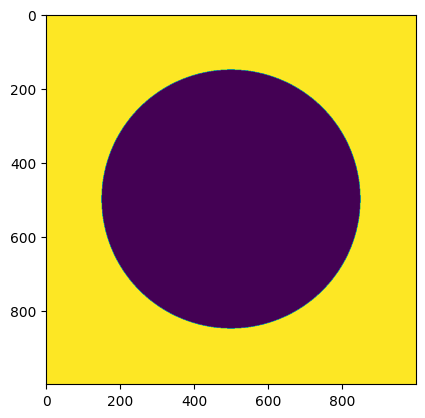

In [2]:
DEG = np.pi/180
Ny=Nx=1000 ### resolution for dielectric pattern
eps = np.ones([Ny,Nx])*8 ### uniform dielectric slab
radius = 0.35
thickness = 0.2
xs,ys = np.linspace(-0.5,0.5,Nx), np.linspace(-0.5,0.5,Ny)
xs,ys = np.meshgrid(xs,ys)
eps[xs**2 + ys**2 < radius**2] = 1 ### air holes in dielectric slab
# eps[xs > 0 ] = 1
#plt.imshow(eps,extent=[-0.5,0.5,-0.5,0.5]); plt.colorbar(); plt.title('dielectric pattern'); plt.show()
### size of truncation of reciprocal lattice:
ind = 1
NM = (2*ind+1)**2
NMNM = NM**2
plt.imshow(eps)

### Gaussian Inc px = 1 py = 0

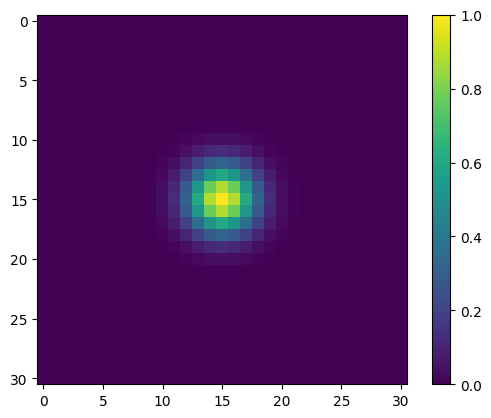

In [3]:
freq = 0.4325000001
# ks = np.linspace(-freq,freq,11)

ks = np.linspace(-3.3000042311E-5,3.3000042311E-5,31)
kxs, kys = np.meshgrid(ks,ks)
kincs = np.vstack([kxs.flatten(),kys.flatten()]).T
# amps = np.exp((-kxs**2-kys**2)/0.2**2)
amps = np.exp((-kxs**2-kys**2)/((3.090000001111E-5)/5)**2)
# amps = np.exp((-kxs**2)/((3.090000001E-5)/5)**2)
plt.imshow(amps)
plt.colorbar()

961it [00:06, 155.66it/s]
961it [00:03, 284.73it/s]
961it [00:02, 328.54it/s]
961it [00:03, 301.27it/s]
961it [00:02, 341.64it/s]


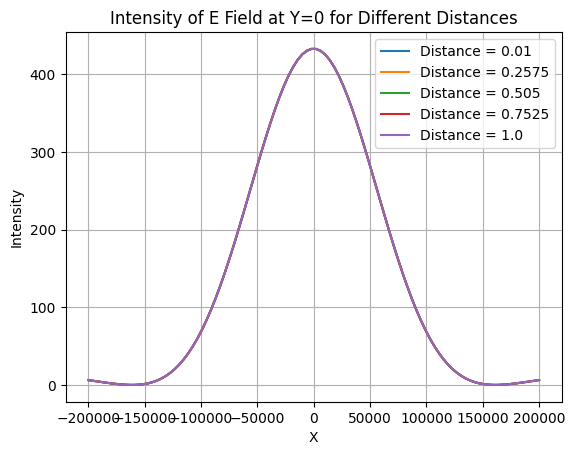

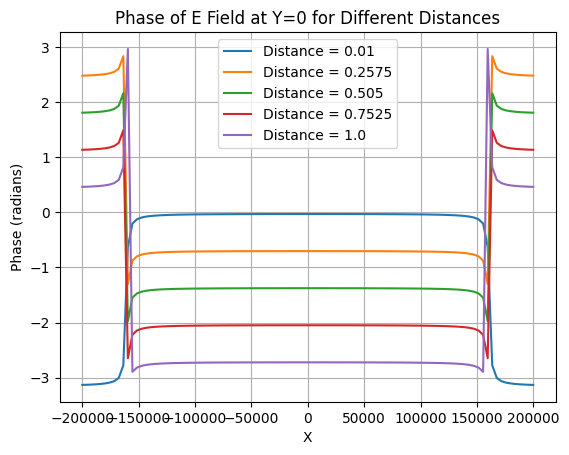

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fields_for_distances(distances):
    freq = 0.4325000001
    k_lim = 4.5e-05
    min_ang = 1E-6
    size = 2E5
    uniform = np.ones([Ny, Nx]) * 8
    thickness = 0.2  
    slab = thickness * .6
    air = np.ones([Nx, Nx])
    gap = 2.45

    combined_intensity_slices = []
    combined_phase_slices = []
    combined_x_axes = []

    for distance in distances:
        obj2 = rcwa([air], [distance], [1], twist=0, N=1, M=1, verbose=0)
        tmp = SummedRCWA(obj2, freq, kincs, amps, -size, size, -size, size)
        tmp.total_RT()
        fields = tmp.get_field(z_offset=[0], which_layers = None, internal = False)
        ex, ey, ez, hx, hy, hz = fields

        # Extract the center slice (Y=0)
        center_y_index = ex.shape[0] // 2
        ex_center_slice = ex[center_y_index, :]
        ey_center_slice = ey[center_y_index, :]
        ez_center_slice = ez[center_y_index, :]

        # Calculate the intensity and phase for the center slice
        intensity_center_slice = np.abs(ex_center_slice)**2 + np.abs(ey_center_slice)**2 + np.abs(ez_center_slice)**2
        lcp_field = ex_center_slice + 1 * ey_center_slice
        phase_center_slice = np.angle(lcp_field)

        x_axis = np.linspace(tmp.x_min, tmp.x_max, ex_center_slice.shape[0])

        # Store slices for combined plots
        combined_intensity_slices.append(intensity_center_slice)
        combined_phase_slices.append(phase_center_slice)
        combined_x_axes.append(x_axis)



    # Plot combined intensity of the center slices
    plt.figure()
    for i, distance in enumerate(distances):
        plt.plot(combined_x_axes[i], combined_intensity_slices[i], label=f'Distance = {distance}')
    plt.title('Intensity of E Field at Y=0 for Different Distances')
    plt.xlabel('X')
    plt.ylabel('Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot combined phase of the center slices
    plt.figure()
    for i, distance in enumerate(distances):
        plt.plot(combined_x_axes[i], combined_phase_slices[i], label=f'Distance = {distance}')
    plt.title('Phase of E Field at Y=0 for Different Distances')
    plt.xlabel('X')
    plt.ylabel('Phase (radians)')
    plt.grid(True)
    plt.legend()
    plt.show()


distances = np.linspace(0.01,1,5)  
plot_fields_for_distances(distances)


### Large Distance for widening 

961it [00:03, 286.84it/s]
961it [00:03, 288.09it/s]
961it [00:03, 277.29it/s]
961it [00:03, 293.89it/s]
961it [00:03, 305.92it/s]


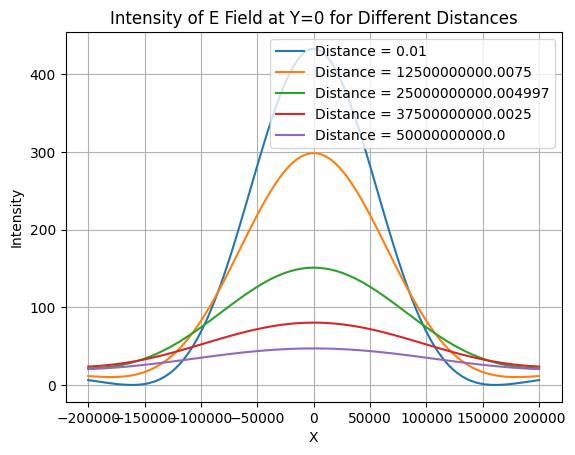

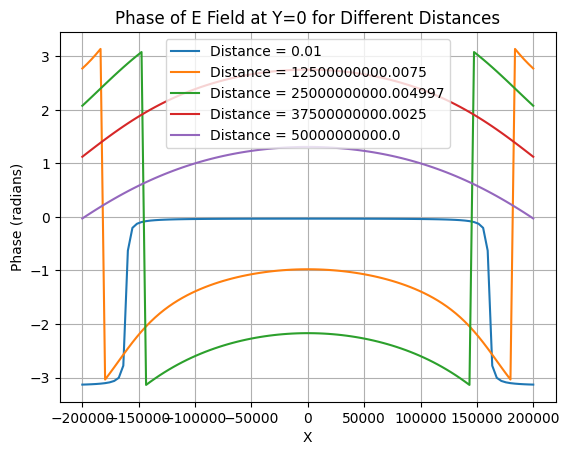

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fields_for_distances(distances):
    freq = 0.4325000001
    k_lim = 4.5e-05
    min_ang = 1E-6
    size = 2E5
    uniform = np.ones([Ny, Nx]) * 8
    thickness = 0.2  
    slab = thickness * .6
    air = np.ones([Nx, Nx])
    gap = 2.45

    combined_intensity_slices = []
    combined_phase_slices = []
    combined_x_axes = []

    for distance in distances:
        obj2 = rcwa([air], [distance], [1], twist=0, N=1, M=1, verbose=0)
        tmp = SummedRCWA(obj2, freq, kincs, amps, -size, size, -size, size)
        tmp.total_RT()
        fields = tmp.get_field(z_offset=[0], which_layers = None, internal = False)
        ex, ey, ez, hx, hy, hz = fields

        # Extract the center slice (Y=0)
        center_y_index = ex.shape[0] // 2
        ex_center_slice = ex[center_y_index, :]
        ey_center_slice = ey[center_y_index, :]
        ez_center_slice = ez[center_y_index, :]

        # Calculate the intensity and phase for the center slice
        intensity_center_slice = np.abs(ex_center_slice)**2 + np.abs(ey_center_slice)**2 + np.abs(ez_center_slice)**2
        lcp_field = ex_center_slice + 1 * ey_center_slice
        phase_center_slice = np.angle(lcp_field)

        x_axis = np.linspace(tmp.x_min, tmp.x_max, ex_center_slice.shape[0])

        # Store slices for combined plots
        combined_intensity_slices.append(intensity_center_slice)
        combined_phase_slices.append(phase_center_slice)
        combined_x_axes.append(x_axis)



    # Plot combined intensity of the center slices
    plt.figure()
    for i, distance in enumerate(distances):
        plt.plot(combined_x_axes[i], combined_intensity_slices[i], label=f'Distance = {distance}')
    plt.title('Intensity of E Field at Y=0 for Different Distances')
    plt.xlabel('X')
    plt.ylabel('Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot combined phase of the center slices
    plt.figure()
    for i, distance in enumerate(distances):
        plt.plot(combined_x_axes[i], combined_phase_slices[i], label=f'Distance = {distance}')
    plt.title('Phase of E Field at Y=0 for Different Distances')
    plt.xlabel('X')
    plt.ylabel('Phase (radians)')
    plt.grid(True)
    plt.legend()
    plt.show()


distances = np.linspace(0.01,5E10,5)  
plot_fields_for_distances(distances)


### Transmitted Field

961it [00:03, 267.33it/s]


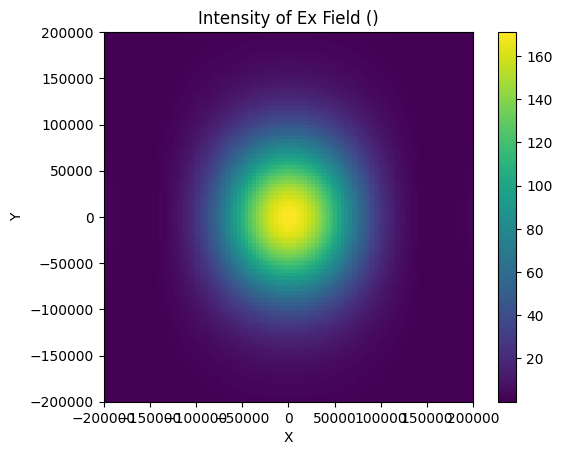

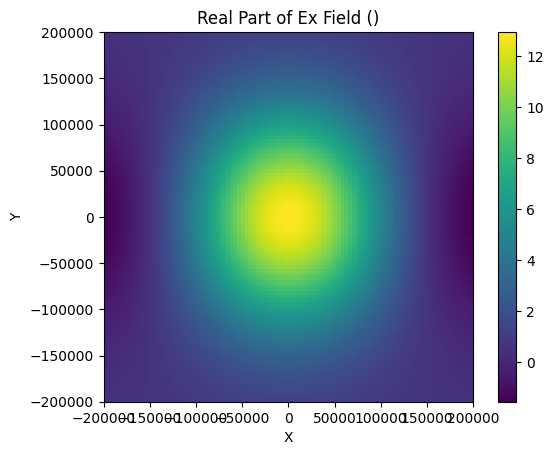

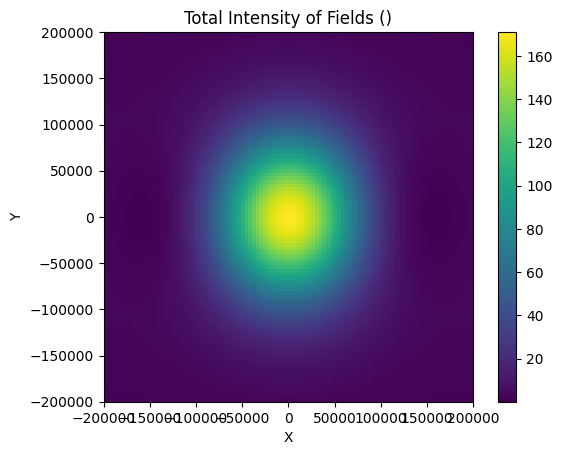

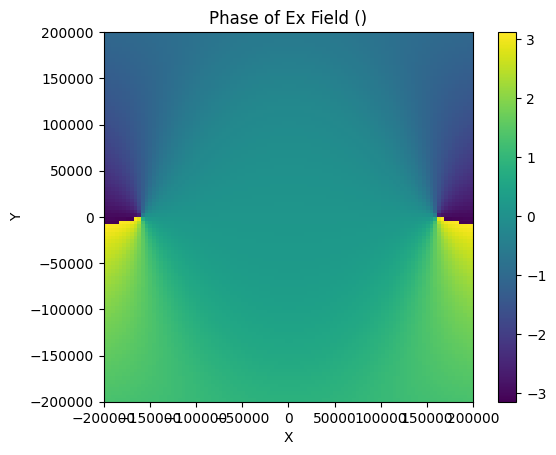

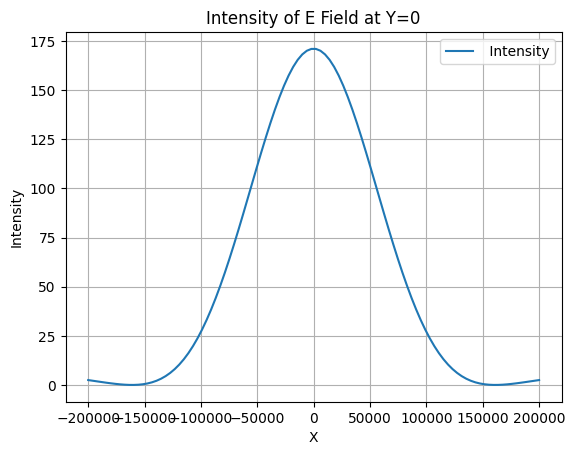

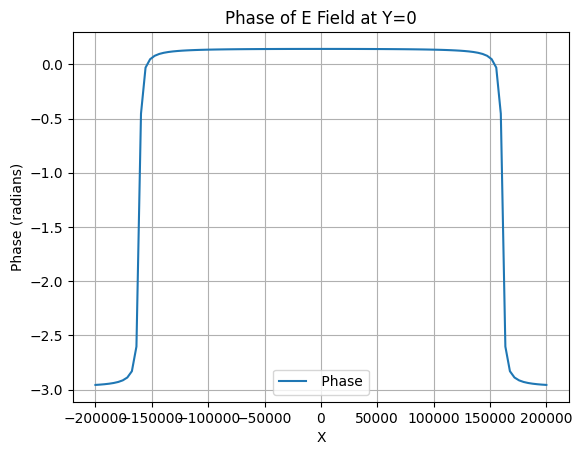

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def rcwa_simulation(layers, thicknesses, indices, twist, N, M, freq, kincs, amps, size, z_offset):
    obj = rcwa(layers, thicknesses, indices, twist=twist, N=N, M=M, verbose=0)
    simulation = SummedRCWA(obj, freq, kincs, amps, -size, size, -size, size)
    simulation.total_RT()
    return simulation.get_field(z_offset=[0],which_layers = None, internal = False), simulation

def plot_fields(fields, simulation, distance_label):
    ex, ey, ez, hx, hy, hz = fields

    plt.figure()
    plt.imshow(np.abs(ex)**2, extent=[simulation.x_min, simulation.x_max, simulation.y_min, simulation.y_max], origin='lower')
    plt.colorbar()
    plt.title(f'Intensity of Ex Field ({distance_label})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    plt.figure()
    plt.imshow(np.real(ex), extent=[simulation.x_min, simulation.x_max, simulation.y_min, simulation.y_max], origin='lower')
    plt.colorbar()
    plt.title(f'Real Part of Ex Field ({distance_label})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    plt.figure()
    plt.imshow(np.abs(ex)**2 + np.abs(ey)**2 + np.abs(ez)**2, extent=[simulation.x_min, simulation.x_max, simulation.y_min, simulation.y_max], origin='lower')
    plt.colorbar()
    plt.title(f'Total Intensity of Fields ({distance_label})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    plt.figure()
    plt.imshow(np.angle((ex * 1 + ey * 1 + ez * 0) / np.sqrt(2)), extent=[simulation.x_min, simulation.x_max, simulation.y_min, simulation.y_max], origin='lower')
    plt.colorbar()
    plt.title(f'Phase of Ex Field ({distance_label})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def plot_center_slice(fields, simulation, distance_label, combined_intensity=None, combined_phase=None):
    ex, ey, ez, hx, hy, hz = fields
    center_y_index = ex.shape[0] // 2
    ex_center_slice = ex[center_y_index, :]
    ey_center_slice = ey[center_y_index, :]
    ez_center_slice = ez[center_y_index, :]

    intensity_center_slice = np.abs(ex_center_slice)**2 + np.abs(ey_center_slice)**2 + np.abs(ez_center_slice)**2
    lcp_field = ex_center_slice + 1 * ey_center_slice
    phase_center_slice = np.angle(lcp_field)

    x_axis = np.linspace(simulation.x_min, simulation.x_max, ex_center_slice.shape[0])

    plt.figure()
    plt.plot(x_axis, intensity_center_slice, label=f'{distance_label} Intensity')
    plt.title('Intensity of E Field at Y=0')
    plt.xlabel('X')
    plt.ylabel('Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(x_axis, phase_center_slice, label=f'{distance_label} Phase')
    plt.title('Phase of E Field at Y=0')
    plt.xlabel('X')
    plt.ylabel('Phase (radians)')
    plt.grid(True)
    plt.legend()
    plt.show()

    if combined_intensity is not None and combined_phase is not None:
        combined_intensity.append((x_axis, intensity_center_slice, distance_label))
        combined_phase.append((x_axis, phase_center_slice, distance_label))

def plot_combined_slices(combined_intensity, combined_phase):
    plt.figure()
    for x_axis, intensity_slice, label in combined_intensity:
        plt.plot(x_axis, intensity_slice, label=label)
    plt.title('Combined Intensity of E Field at Y=0')
    plt.xlabel('X')
    plt.ylabel('Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure()
    for x_axis, phase_slice, label in combined_phase:
        plt.plot(x_axis, phase_slice, label=label)
    plt.title('Combined Phase of E Field at Y=0')
    plt.xlabel('X')
    plt.ylabel('Phase (radians)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Main Parameters
ind = 1
n_ang = 21
min_ang = 1E-6
k_lim = 0.0000450000001
size = 2E5
freq = 0.43250000000001
uniform = np.ones([Ny, Nx]) * 8
thickness = 0.2  
slab = thickness * .6
air = np.ones([Nx, Nx])
gap = 2


# Simulation for twisted structure
layers_twisted = [air, uniform, air]
thicknesses_twisted = [gap, thickness, gap]
fields_twisted, sim_twisted = rcwa_simulation(layers_twisted, thicknesses_twisted, [1, 1, 1], np.deg2rad(0), ind, ind, freq, kincs, amps, size, 100)
plot_fields(fields_twisted, sim_twisted, "")
combined_intensity = []
combined_phase = []
plot_center_slice(fields_twisted, sim_twisted, "", combined_intensity, combined_phase)



### Internal Field

961it [00:03, 280.64it/s]


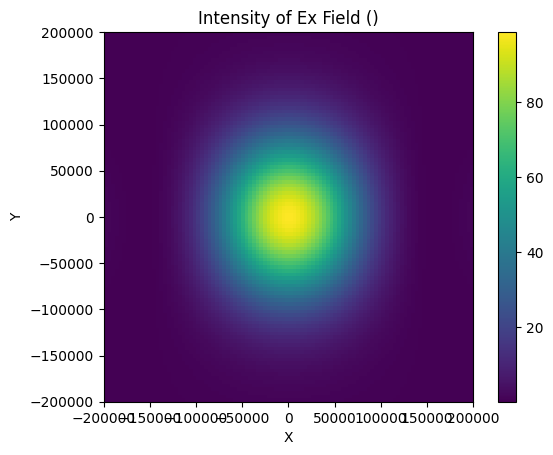

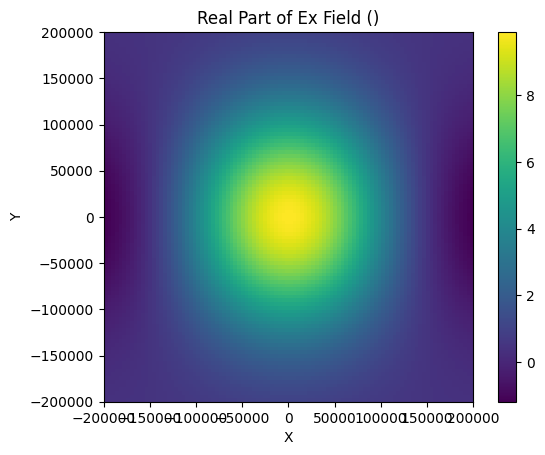

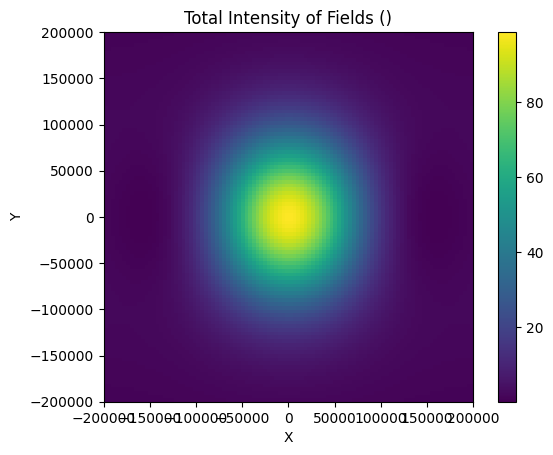

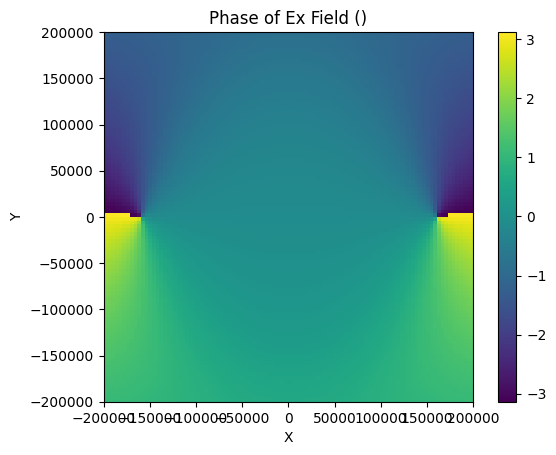

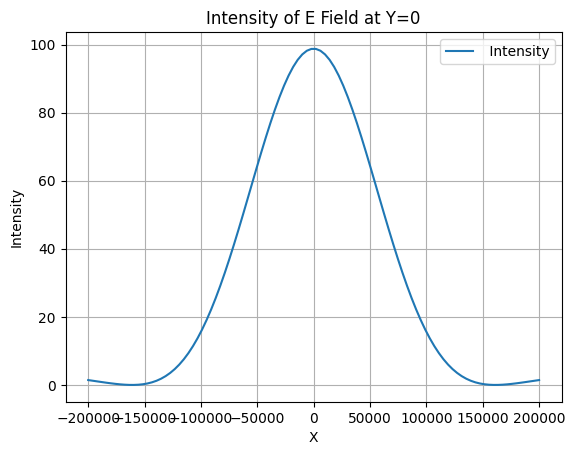

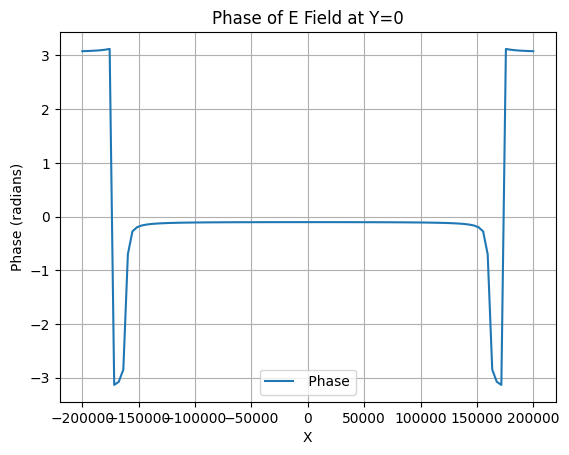

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def rcwa_simulation(layers, thicknesses, indices, twist, N, M, freq, kincs, amps, size, z_offset):
    obj = rcwa(layers, thicknesses, indices, twist=twist, N=N, M=M, verbose=0)
    simulation = SummedRCWA(obj, freq, kincs, amps, -size, size, -size, size)
    simulation.total_RT()
    return simulation.get_field(z_offset=[thickness/2],which_layers = [1], internal = True), simulation

def plot_fields(fields, simulation, distance_label):
    ex, ey, ez, hx, hy, hz = fields

    plt.figure()
    plt.imshow(np.abs(ex)**2, extent=[simulation.x_min, simulation.x_max, simulation.y_min, simulation.y_max], origin='lower')
    plt.colorbar()
    plt.title(f'Intensity of Ex Field ({distance_label})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    plt.figure()
    plt.imshow(np.real(ex), extent=[simulation.x_min, simulation.x_max, simulation.y_min, simulation.y_max], origin='lower')
    plt.colorbar()
    plt.title(f'Real Part of Ex Field ({distance_label})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    plt.figure()
    plt.imshow(np.abs(ex)**2 + np.abs(ey)**2 + np.abs(ez)**2, extent=[simulation.x_min, simulation.x_max, simulation.y_min, simulation.y_max], origin='lower')
    plt.colorbar()
    plt.title(f'Total Intensity of Fields ({distance_label})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    plt.figure()
    plt.imshow(np.angle((ex * 1 + ey * 1 + ez * 0) / np.sqrt(2)), extent=[simulation.x_min, simulation.x_max, simulation.y_min, simulation.y_max], origin='lower')
    plt.colorbar()
    plt.title(f'Phase of Ex Field ({distance_label})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def plot_center_slice(fields, simulation, distance_label, combined_intensity=None, combined_phase=None):
    ex, ey, ez, hx, hy, hz = fields
    center_y_index = ex.shape[0] // 2
    ex_center_slice = ex[center_y_index, :]
    ey_center_slice = ey[center_y_index, :]
    ez_center_slice = ez[center_y_index, :]

    intensity_center_slice = np.abs(ex_center_slice)**2 + np.abs(ey_center_slice)**2 + np.abs(ez_center_slice)**2
    lcp_field = ex_center_slice + 1 * ey_center_slice
    phase_center_slice = np.angle(lcp_field)

    x_axis = np.linspace(simulation.x_min, simulation.x_max, ex_center_slice.shape[0])

    plt.figure()
    plt.plot(x_axis, intensity_center_slice, label=f'{distance_label} Intensity')
    plt.title('Intensity of E Field at Y=0')
    plt.xlabel('X')
    plt.ylabel('Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(x_axis, phase_center_slice, label=f'{distance_label} Phase')
    plt.title('Phase of E Field at Y=0')
    plt.xlabel('X')
    plt.ylabel('Phase (radians)')
    plt.grid(True)
    plt.legend()
    plt.show()

    if combined_intensity is not None and combined_phase is not None:
        combined_intensity.append((x_axis, intensity_center_slice, distance_label))
        combined_phase.append((x_axis, phase_center_slice, distance_label))

def plot_combined_slices(combined_intensity, combined_phase):
    plt.figure()
    for x_axis, intensity_slice, label in combined_intensity:
        plt.plot(x_axis, intensity_slice, label=label)
    plt.title('Combined Intensity of E Field at Y=0')
    plt.xlabel('X')
    plt.ylabel('Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure()
    for x_axis, phase_slice, label in combined_phase:
        plt.plot(x_axis, phase_slice, label=label)
    plt.title('Combined Phase of E Field at Y=0')
    plt.xlabel('X')
    plt.ylabel('Phase (radians)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Main Parameters
ind = 1
n_ang = 21
min_ang = 1E-6
k_lim = 0.0000450000001
size = 2E5
freq = 0.43250000000001
uniform = np.ones([Ny, Nx]) * 8
thickness = 0.2  
slab = thickness * .6
air = np.ones([Nx, Nx])
gap = 2


# Simulation for twisted structure
layers_twisted = [air, uniform, air]
thicknesses_twisted = [gap, thickness, gap]
fields_twisted, sim_twisted = rcwa_simulation(layers_twisted, thicknesses_twisted, [1, 1, 1], np.deg2rad(0), ind, ind, freq, kincs, amps, size, 100)
plot_fields(fields_twisted, sim_twisted, "")
combined_intensity = []
combined_phase = []
plot_center_slice(fields_twisted, sim_twisted, "", combined_intensity, combined_phase)

